# Linear Regression Ecommerce Project

Context: You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

** Main objective - Help the company determine if they should optimize the mobile app or website experience in order to grow sales **

* This is dummy data; credit card numbers or emails are not real.

## Import our dependencies for explatory analysis
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(We'll import sklearn later when needed.)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

The company has provided  a csv with details of its customers. We can store this data in a dataframe called 'ecom'

In [17]:
ecom = pd.read_csv('Ecommerce Customers')

In [19]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Check the head of customers, and check out its info() and describe() methods.**

In [20]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [21]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [23]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


___
We can establish that the data contains the following features (parameters) expressed as columns:

It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.
* Yearly Amount Spent: Average amount of money spent by a customer in a year

The data also has no missing values.

___
## Exploratory Data Analysis

To explore this data we'll only be using the numerical data of the csv file.
___
**Because our aim is to figure out whether our client needs to optimize for mobile or website to increase sales we can use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [32]:
sns.set_style('whitegrid')

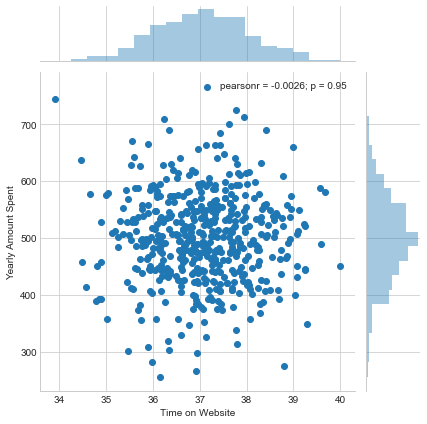

In [102]:
sns.jointplot(x = 'Time on Website', y= 'Yearly Amount Spent', data = ecom)

#the correlation is not obvious, however, there seems to be density around the mean

** And then view the same with the Time on App column instead. **

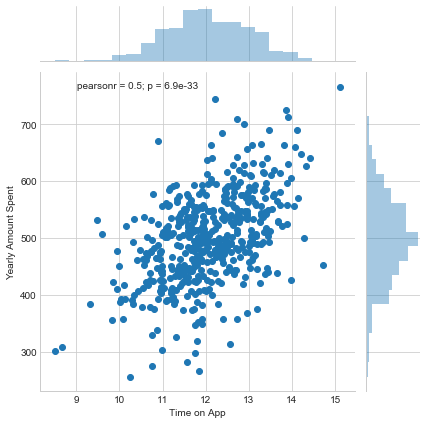

In [39]:
sns.jointplot(x = 'Time on App',y = 'Yearly Amount Spent',data=ecom)

#we can generally observe that the more time someone spent on the app, the more money they spent

** We can then use the jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

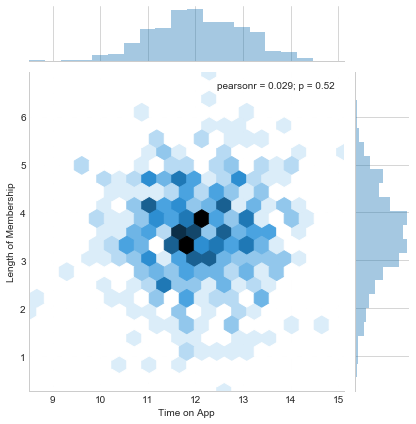

In [40]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', kind='hex', data=ecom)

**We can explore these types of relationships across the entire data set using a [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

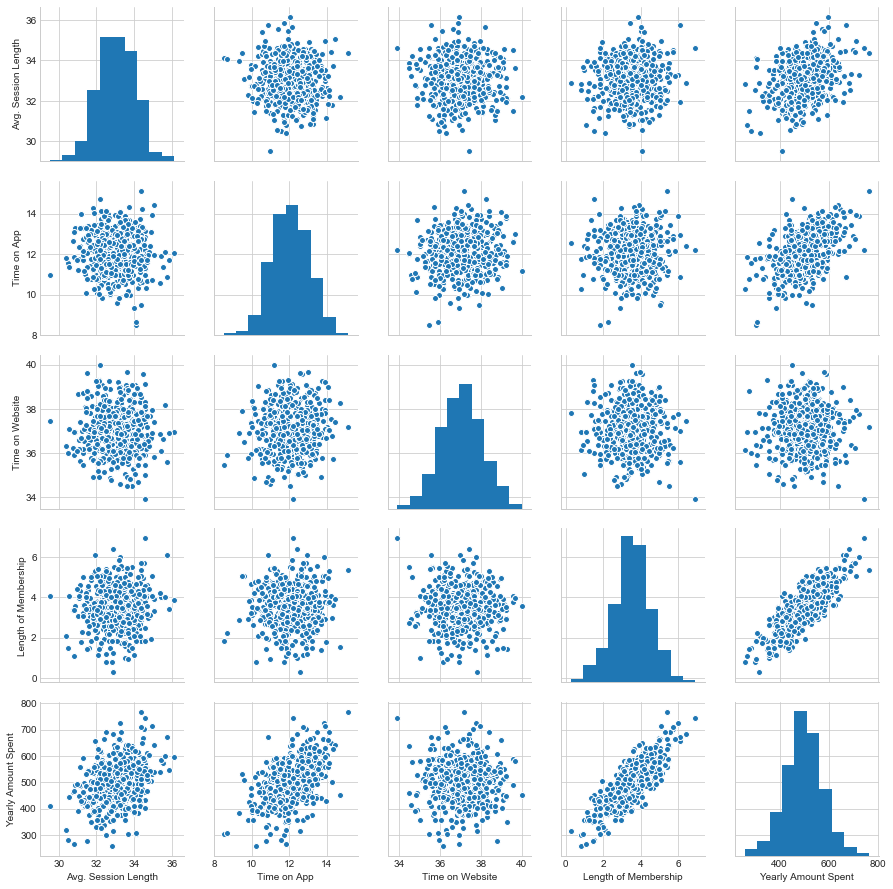

In [41]:
sns.pairplot(ecom)

**Based off this plot, Length of Membership seems to be the most correlated feature with Yearly Amount Spent?**

**We can then create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

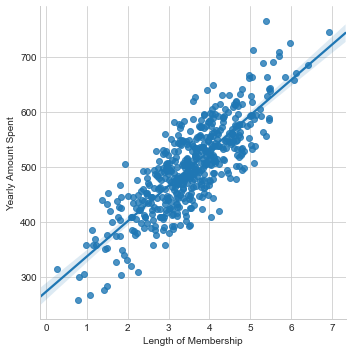

In [43]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=ecom)

## Training and Testing Data

After this brief exploration we can now go ahead to split the data into training and testing sets.
** We can set a variable X,the independent variables, equal to the numerical features of the customers and a variable y, the dependent variable, equal to the "Yearly Amount Spent" column. **

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
ecom.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [49]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [53]:
X = ecom[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [55]:
y = ecom[['Yearly Amount Spent']]
y.head()

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092


** We can then split the data into training and testing sets.**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

We then train our model on our training data.


In [57]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [58]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [59]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**What are our coeffiecients of the model?**

In [66]:
print(lm.coef_)  #==> these relate directly with all our independent variables

[[ 25.98154972  38.59015875   0.19040528  61.27909654]]


**We can then put the coefficients in a dataframe**

In [73]:
coeff_df = pd.DataFrame(lm.coef_[0],X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**What is our intercept**

In [64]:
lm.intercept_

array([-1047.93278225])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values.

** Use lm.predict() to predict off the X_test set of the data.**

In [103]:
predictions = lm.predict(X_test)
predictions[:10]  #==> first 10 predictions

array([[ 456.44186104],
       [ 402.72005312],
       [ 409.2531539 ],
       [ 591.4310343 ],
       [ 590.01437275],
       [ 548.82396607],
       [ 577.59737969],
       [ 715.44428115],
       [ 473.7893446 ],
       [ 545.9211364 ]])

** How do our real test values versus the predicted values look like in scatterplot. **

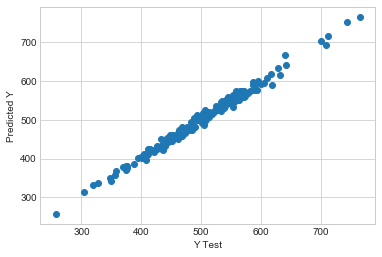

In [105]:
plt.scatter(x = y_test, y = predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** We can do this by calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [93]:
from sklearn import metrics

In [98]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

Let's quickly explore the residuals to make sure linear regression was the right model to use here & that our data was reasonably okay. 

**We are testing to see whether the residuals are normally distributed and so we plot a histogram of the residuals.**

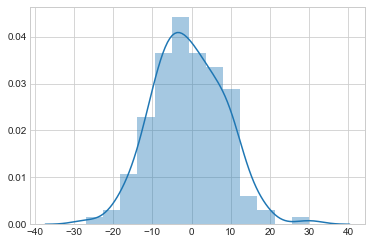

In [99]:
sns.distplot((y_test-predictions))

## Conclusion
We still want to figure out the answer to the original question, do we optimise for the mobile app or website? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [101]:
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** What insights do these coefficients give us relating to annual sales? **

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Objectively, should the company should focus more on their mobile app or on their website to increase sales?**

A few issues arise here that need to be investigated further:
* Perhaps, enhanced perfomance of the website has low effect on overal sales because the mobile app is better developed. The company can evaluate the impact of upgrading the website.

* The company could focus on the mobile app since it is what is already working. However, we further need data on adoption of the app/ downloads to know whether the rate of app downloads is sustainable or there is likely a situation of market saturation in the near term.

* However, what seems rather clear is the impact of a customer sticking with the brand for a longer period of time. We may need to look in to exploring the relationship between Length of Membership and the App or the Website to conclusively establish the more superior platform!